# Created Day or Hour or Month

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

pd.set_option('display.max_info_columns', 10000)   # zeigt alle Spaltennamen in info()
pd.set_option('display.max_info_rows', 200000)     # zeigt Zeileninfo, wenn nötig


# Pfad zur Datei (liegt im gleichen Ordner wie das Notebook)
path = Path("dataset/311_Service_Requests_2024.csv")

# Einfacher Import
df = pd.read_csv(path)

In [31]:
# Modus berechnen
mode_hour = df["CREATED_HOUR"].mode()[0]
mode_weekday = df["CREATED_DAY_OF_WEEK"].mode()[0]
mode_month = df["CREATED_MONTH"].mode()[0]

# Mappings für lesbare Namen
weekday_names = {
    1: "Sunday",
    2: "Monday",
    3: "Tuesday",
    4: "Wednesday",
    5: "Thursday",
    6: "Friday",
    7: "Saturday"
}

month_names = {
    1: "January",  2: "February", 3: "March",
    4: "April",    5: "May",      6: "June",
    7: "July",     8: "August",   9: "September",
    10: "October", 11: "November",12: "December"
}

# Lesbarer Output
print(f"Modus Stunde: {mode_hour}:00 Uhr")
print(f"Modus Wochentag: {weekday_names.get(mode_weekday, mode_weekday)}")
print(f"Modus Monat: {month_names.get(mode_month, mode_month)}")


Modus Stunde: 8:00 Uhr
Modus Wochentag: Saturday
Modus Monat: July


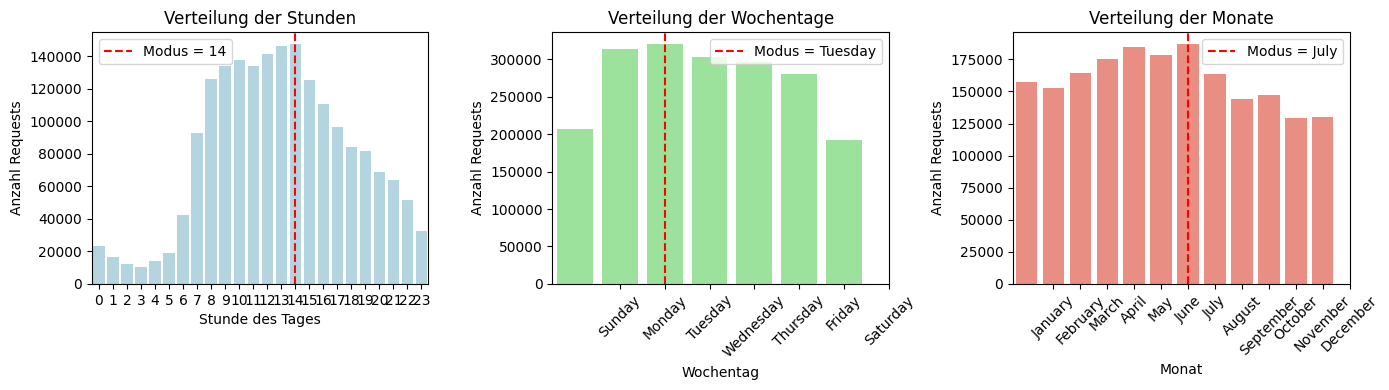

In [6]:
# Wochentage in richtiger Reihenfolge
weekday_order = [1,2,3,4,5,6,7]

plt.figure(figsize=(14,4))

# Stunde
plt.subplot(1,3,1)
sns.countplot(x="CREATED_HOUR", data=df, color="lightblue")
plt.title("Verteilung der Stunden")
plt.xlabel("Stunde des Tages")
plt.ylabel("Anzahl Requests")
plt.axvline(mode_hour, color='red', linestyle='--', label=f"Modus = {mode_hour}")
plt.legend()

# Wochentag
plt.subplot(1,3,2)
sns.countplot(x="CREATED_DAY_OF_WEEK", data=df, color="lightgreen", order=weekday_order)
plt.title("Verteilung der Wochentage")
plt.xlabel("Wochentag")
plt.ylabel("Anzahl Requests")
plt.xticks(ticks=weekday_order, labels=[weekday_names[i] for i in weekday_order], rotation=45)
plt.axvline(mode_weekday-1, color='red', linestyle='--', label=f"Modus = {weekday_names.get(mode_weekday)}")
plt.legend()

# Monat
plt.subplot(1,3,3)
sns.countplot(x="CREATED_MONTH", data=df, color="salmon")
plt.title("Verteilung der Monate")
plt.xlabel("Monat")
plt.ylabel("Anzahl Requests")
plt.xticks(ticks=range(1,13), labels=[month_names[i] for i in range(1,13)], rotation=45)
plt.axvline(mode_month-1, color='red', linestyle='--', label=f"Modus = {month_names.get(mode_month)}")
plt.legend()

plt.tight_layout()
plt.show()


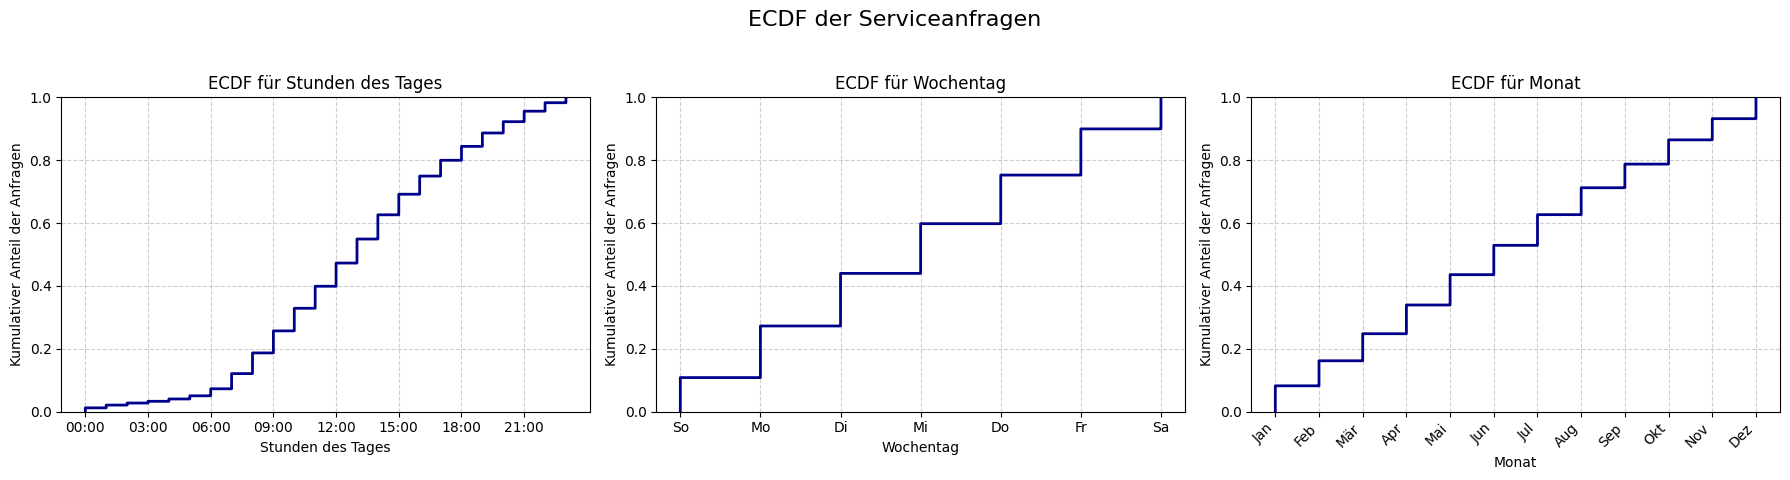

In [13]:
# Mappings für lesbare Namen
weekday_names = {
    1: "So", 
    2: "Mo",
    3: "Di",
    4: "Mi",
    5: "Do",
    6: "Fr",
    7: "Sa"
}

month_names = {
    1: "Jan", 2: "Feb", 3: "Mär", 4: "Apr", 
    5: "Mai", 6: "Jun", 7: "Jul", 8: "Aug", 
    9: "Sep", 10: "Okt", 11: "Nov", 12: "Dez"
}

time_columns = ['CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH']

# Erstellung der ECDF
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('ECDF der Serviceanfragen', fontsize=16)

column_titles = {
    'CREATED_HOUR': 'Stunden des Tages',
    'CREATED_DAY_OF_WEEK': 'Wochentag',
    'CREATED_MONTH': 'Monat'
}

for i, col in enumerate(time_columns):
    data_sorted = df[col].sort_values().dropna()
    
    # ECDF-Plot
    sns.ecdfplot(data=data_sorted, ax=axes[i], stat='proportion', complementary=False, linestyle='-', drawstyle='steps-post', linewidth=2, color='darkblue') 
    axes[i].set_title(f"ECDF für {column_titles[col]}", fontsize=12)
    axes[i].set_xlabel(column_titles[col])
    axes[i].set_ylabel('Kumulativer Anteil der Anfragen')
    axes[i].grid(True, linestyle='--', alpha=0.6)
    
    if col == 'CREATED_HOUR':
        axes[i].set_xticks(range(0, 24, 3))
        axes[i].set_xticklabels([f'{h:02d}:00' for h in range(0, 24, 3)])
        
    elif col == 'CREATED_DAY_OF_WEEK':
        ticks = sorted(weekday_names.keys())
        labels = [weekday_names[t] for t in ticks]
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(labels)
        
    elif col == 'CREATED_MONTH':
        ticks = sorted(month_names.keys())
        labels = [month_names[t] for t in ticks]
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(labels, rotation=45, ha='right')
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ergebnis ECDF
- die Kurve ist am steilsten zwischen 6 Uhr und 18 Uhr, die meisten SR treffen da ein
- bei 0.5 ist ca. bei 13 Uhr



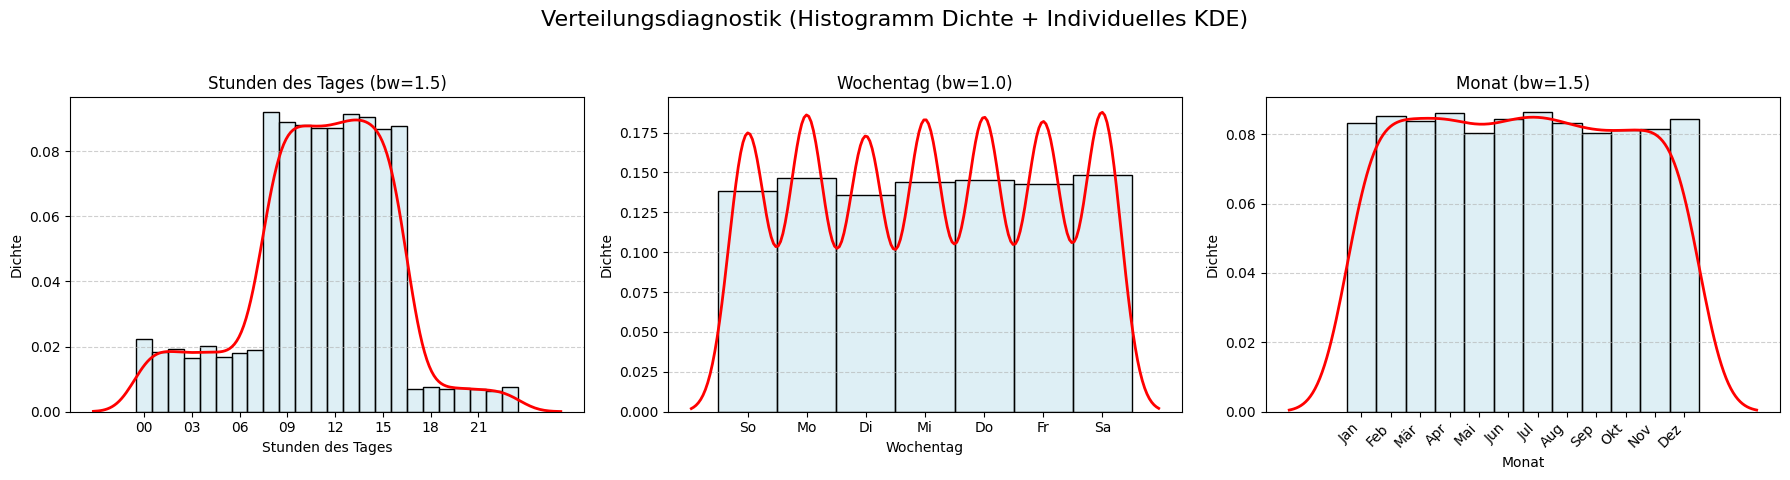

In [30]:
weekday_names = {1: "So", 2: "Mo", 3: "Di", 4: "Mi", 5: "Do", 6: "Fr", 7: "Sa"}
month_names = {1: "Jan", 2: "Feb", 3: "Mär", 4: "Apr", 5: "Mai", 6: "Jun", 
               7: "Jul", 8: "Aug", 9: "Sep", 10: "Okt", 11: "Nov", 12: "Dez"}
time_columns = ['CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH']
column_titles = {
    'CREATED_HOUR': 'Stunden des Tages',
    'CREATED_DAY_OF_WEEK': 'Wochentag',
    'CREATED_MONTH': 'Monat'
}

BW_ADJUST_MAP = {
    'CREATED_HOUR': 1.5,   
    'CREATED_DAY_OF_WEEK': 1.0, 
    'CREATED_MONTH': 1.5  
}
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle(f'Verteilungsdiagnostik (Histogramm Dichte + Individuelles KDE)', fontsize=16)

for i, col in enumerate(time_columns):

    current_bw_adjust = BW_ADJUST_MAP[col]
    
 
    if col == 'CREATED_HOUR':
        bins_range = range(0, 25) 
    elif col == 'CREATED_DAY_OF_WEEK':
        bins_range = range(1, 9)
    elif col == 'CREATED_MONTH':
        bins_range = range(1, 14)
        
    # Histogramm:
    sns.histplot(data=df, x=col, ax=axes[i], 
                 stat='density', 
                 discrete=True, 
                 kde=False, 
                 bins=bins_range,
                 color='lightblue', edgecolor='black', alpha=0.4)
    
 
    sns.kdeplot(data=df, x=col, ax=axes[i], 
                bw_adjust=current_bw_adjust,  
                color='red', lw=2)
    
    axes[i].set_title(f"{column_titles[col]} (bw={current_bw_adjust})", fontsize=12)
    axes[i].set_xlabel(column_titles[col])
    axes[i].set_ylabel('Dichte') 
    axes[i].grid(axis='y', linestyle='--', alpha=0.6)
  
    if col == 'CREATED_HOUR':
        ticks = range(0, 24)
        labels = [f'{h:02d}' for h in ticks]
        axes[i].set_xticks(ticks[::3])
        axes[i].set_xticklabels(labels[::3])
        
    elif col == 'CREATED_DAY_OF_WEEK':
        ticks = sorted(weekday_names.keys())
        labels = [weekday_names[t] for t in ticks]
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(labels)
        
    elif col == 'CREATED_MONTH':
        ticks = sorted(month_names.keys())
        labels = [month_names[t] for t in ticks]
        axes[i].set_xticks(ticks)
        axes[i].set_xticklabels(labels, rotation=45, ha='right')
        
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Ergebnis Histogram und QQ

- Man kann sehen, dass besonders bei Stunden des Tages es deutlich Unterschiede gibt wann SR eintreten. 

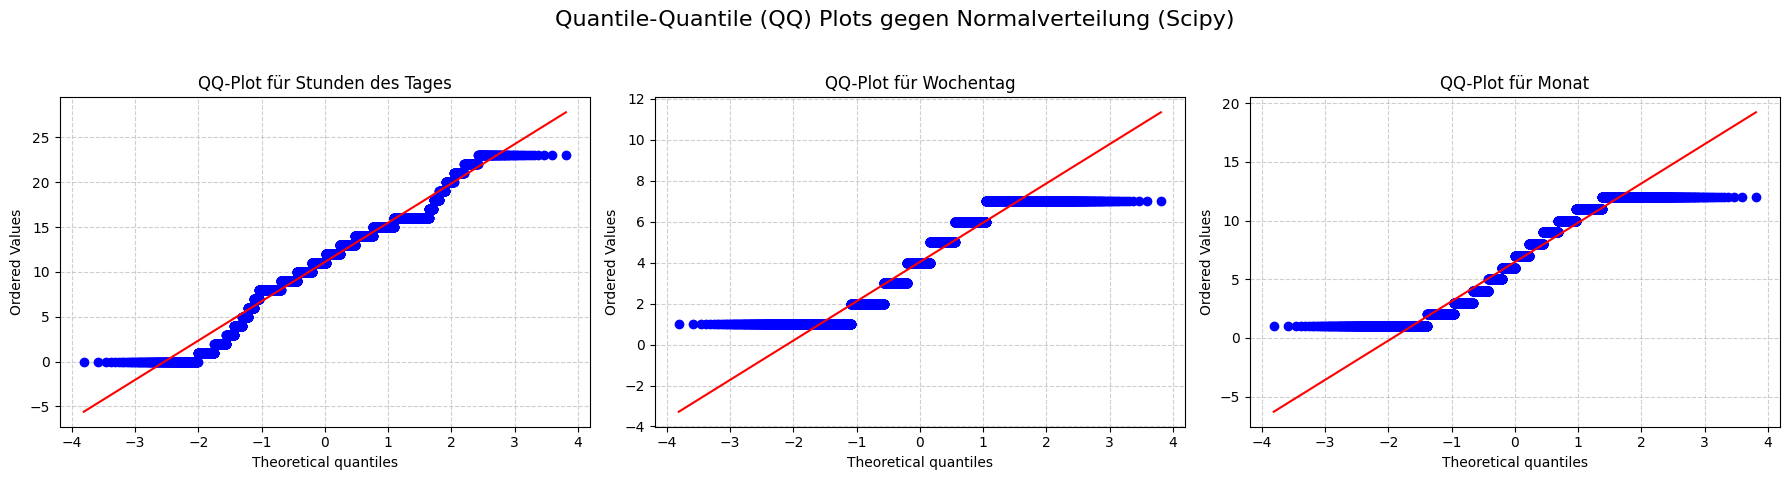

In [28]:
from scipy import stats 

# Mappings und Spaltennamen
time_columns = ['CREATED_HOUR', 'CREATED_DAY_OF_WEEK', 'CREATED_MONTH']
column_titles = {
    'CREATED_HOUR': 'Stunden des Tages',
    'CREATED_DAY_OF_WEEK': 'Wochentag',
    'CREATED_MONTH': 'Monat'
}

# Erstellung der QQ-Plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Quantile-Quantile (QQ) Plots gegen Normalverteilung (Scipy)', fontsize=16)

for i, col in enumerate(time_columns):
    
    stats.probplot(df[col].dropna(), dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ-Plot für {column_titles[col]}", fontsize=12)
    axes[i].grid(True, linestyle='--', alpha=0.6)
    
# Anpassung des Layouts
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

QQ Plot Erkenntnis: 

- keine Kommastellen, deswegen keine kontinuierliche Linie
- Keine Normalverteilung

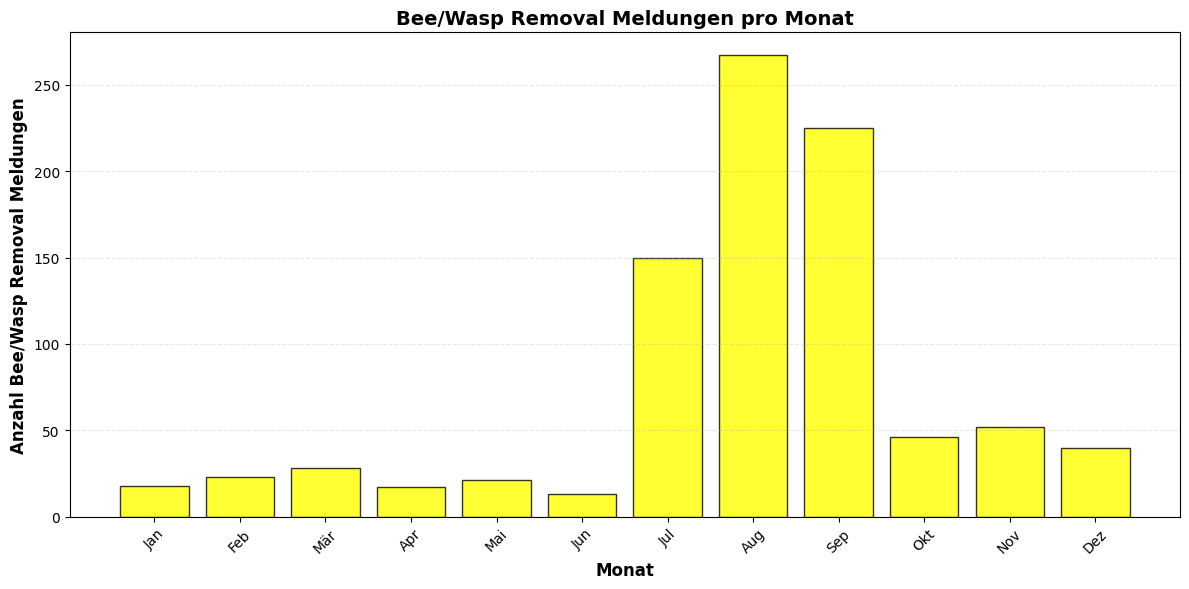

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('dataset/311_Service_Requests_2024.csv')

df['CREATED_DATE'] = pd.to_datetime(df['CREATED_DATE'])


bee_wasp_df = df[df['SR_SHORT_CODE'] == 'SGG'].copy()  # SGG steht für Bee/Wasp 

bee_wasp_df['Monat'] = bee_wasp_df['CREATED_DATE'].dt.month

monthly_counts = bee_wasp_df.groupby('Monat').size()
all_months = pd.Series(0, index=range(1, 13))
all_months.update(monthly_counts)

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(all_months.index, all_months.values, color='yellow', edgecolor='black', alpha=0.8)

month_names = ['Jan', 'Feb', 'Mär', 'Apr', 'Mai', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Okt', 'Nov', 'Dez']
plt.xticks(range(1, 13), month_names, rotation=45)
plt.xlabel('Monat', fontsize=12, fontweight='bold')
plt.ylabel('Anzahl Bee/Wasp Removal Meldungen', fontsize=12, fontweight='bold')
plt.title('Bee/Wasp Removal Meldungen pro Monat', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')
plt.tight_layout()
plt.show()


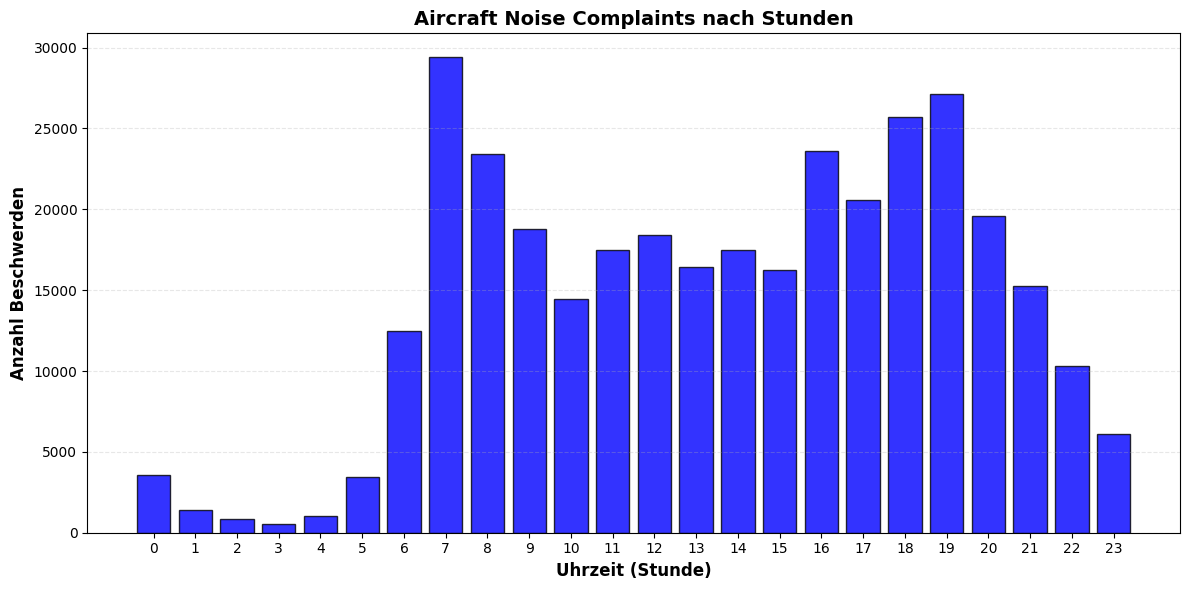

In [60]:

# Nur "Aircraft Noise Complaint" filtern
aircraft_df = df[df['SR_TYPE'] == 'Aircraft Noise Complaint'].copy()

# Stunde extrahieren
aircraft_df['Stunde'] = aircraft_df['CREATED_DATE'].dt.hour

# Anzahl pro Stunde zählen
hourly_counts = aircraft_df.groupby('Stunde').size()

# Alle 24 Stunden sicherstellen
all_hours = pd.Series(0, index=range(0, 24))
all_hours.update(hourly_counts)

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(all_hours.index, all_hours.values, color='blue', edgecolor='black', alpha=0.8)

plt.xlabel('Uhrzeit (Stunde)', fontsize=12, fontweight='bold')
plt.ylabel('Anzahl Beschwerden', fontsize=12, fontweight='bold')
plt.title('Aircraft Noise Complaints nach Stunden', fontsize=14, fontweight='bold')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()


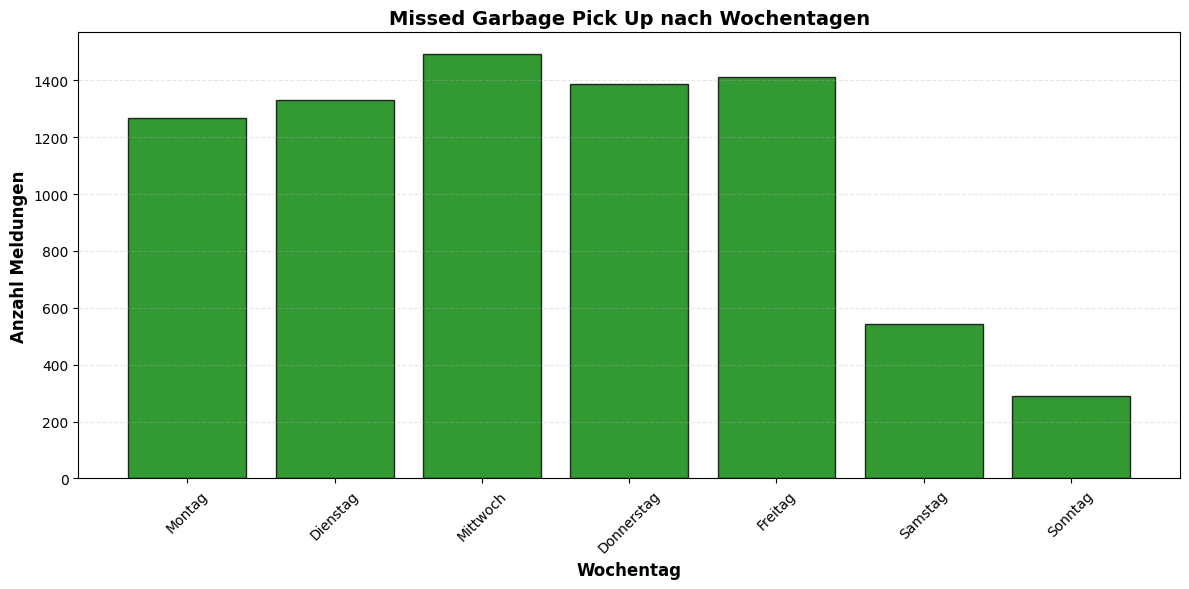

In [61]:
garbage_df = df[df['SR_TYPE'].str.contains('Missed Garbage', case=False, na=False)].copy()

# Wochentag extrahieren (0=Montag, 6=Sonntag)
garbage_df['Wochentag'] = garbage_df['CREATED_DATE'].dt.dayofweek

# Anzahl pro Wochentag zählen
daily_counts = garbage_df.groupby('Wochentag').size()

# Alle 7 Tage sicherstellen
all_days = pd.Series(0, index=range(0, 7))
all_days.update(daily_counts)

# Plot erstellen
plt.figure(figsize=(12, 6))
plt.bar(all_days.index, all_days.values, color='green', edgecolor='black', alpha=0.8)

# Wochentagnamen für X-Achse
day_names = ['Montag', 'Dienstag', 'Mittwoch', 'Donnerstag', 'Freitag', 'Samstag', 'Sonntag']
plt.xticks(range(0, 7), day_names, rotation=45)

plt.xlabel('Wochentag', fontsize=12, fontweight='bold')
plt.ylabel('Anzahl Meldungen', fontsize=12, fontweight='bold')
plt.title('Missed Garbage Pick Up nach Wochentagen', fontsize=14, fontweight='bold')
plt.grid(axis='y', alpha=0.3, linestyle='--')

plt.tight_layout()
plt.show()